# Naive Bayes Algorithm
Dataset: NOAA Reef Check Bleaching Data from Kaggle

Link: https://www.kaggle.com/datasets/oasisdata/noaa-reef-check-coral-bleaching-data

The dataset has been prepared beforehand and the CSV can be found at:
https://github.com/alyshapm/coral-reef-bleaching/blob/main/NOAA_ReefCheck/NOAA_int.csv

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [2]:
# Accessing the dataset
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/NOAA_ReefCheck/NOAA_int.csv'
df = pd.read_csv(url)
df.head()

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


In [3]:
# Setting the target and features for Naive Bayes
target = df["Bleaching"]
features = df.drop(["Bleaching","Ocean","Year", "Depth"], axis=1)

In [4]:
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix:\n",confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test, zero_division=0))

Gaussian Naive Bayes model accuracy(in %): 92.61155815654718
Confusion Matrix:
 [[2515   43]
 [ 159   17]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2558
           1       0.28      0.10      0.14       176

    accuracy                           0.93      2734
   macro avg       0.61      0.54      0.55      2734
weighted avg       0.90      0.93      0.91      2734



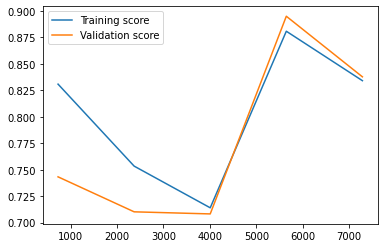

In [10]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(gnb, X, y)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()